In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
inflation = pd.read_csv('Price_index.csv',index_col = 0)

inflation.astype(dtype = 'float')    ## Je m'assure du type de données ##

inflation.columns = ['price']
inflation['delta'] = ((inflation['price'] - inflation['price'].shift(12))/inflation['price']) * 100
inflation = inflation.loc['1976-01-01':'2017-03-01']
#print(inflation['delta'])

#plt.figure(1)
#inflation['delta'].plot()
#plt.show()

m1 = pd.read_csv('M1_USA.csv', index_col = 0)

m1.astype(dtype = 'float')  ## Je m'assure du type de données ##

m1.columns = ['M1']
M1 = m1['M1'] * 0.001 

delta_difference = ((M1 - M1.shift(12))/M1) * 100

delta_difference = pd.DataFrame(delta_difference)
delta_difference = delta_difference.loc['1976-01-01':'2017-03-01']

delta_difference.astype(dtype = 'float')  ## Je m'assure du type de données ##

delta_difference.columns=['0']

<Figure size 432x288 with 0 Axes>

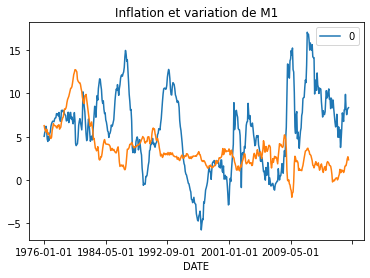

In [11]:
plt.figure()
delta_difference.plot()
inflation['delta'].plot()
plt.title('Inflation et variation de M1')
plt.show()

In [12]:
############# Analyse statistique de base #############

## inlfation et delta_difference de m1 entre 1976 et 2017 ##

x1 = inflation['delta'].values 
y1 = delta_difference['0'].values

from scipy.stats import pearsonr
coeff_pearson = pearsonr(x1,y1)
print("coefficient de Pearson = {}".format(coeff_pearson))

coefficient de Pearson = (-0.060507770131066174, 0.17893508470249514)


In [14]:
## inlfation et delta_difference de m1 entre 1985 et 2017 ##

delta_difference_1985 = delta_difference.loc['1985-01-01':'2017-03-01']
inflation_1985 = inflation.loc['1985-01-01':'2017-03-01']

x2 = inflation_1985['delta'].values 
y2 = delta_difference_1985['0'].values

from scipy.stats import pearsonr
coeff_pearson = pearsonr(x2,y2)
print("coefficient de Pearson après 1985 = {}".format(coeff_pearson))

coefficient de Pearson après 1985 = (-0.3129204292789552, 3.0793090121753316e-10)
